# Multiclass CNN classification on "MNIST dataset"

In [93]:
# Copyright 2019 The TensorHub Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorhub.models.image.classifiers import VGG16 

## Data preparation for model training

In [88]:
def resize_n_normalize_image(small_img, b=32, h=32):
    img = Image.fromarray(small_img, "L") # reading a gray scale image from array
    img = img.convert(mode='RGB') # added 3 channels to grapy scale image
    img = img.resize((b, h), Image.ANTIALIAS) # resizing the image
    return np.array(img)/255.0 # normalizing the image

mnist images are 28*28 images

After resizing
train data shape: (60000, 32, 32, 3)
test data shape: (10000, 32, 32, 3) 

train labels shape: (60000, 10)
test labels shape: (10000, 10) 

MNIST data:

sample image in training data


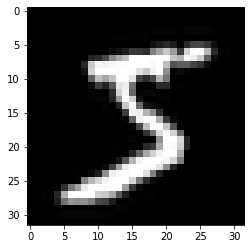

sample training lables
[5 0 4 1 9 2 1 3 1 4]

training lables after one hot encoding
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [90]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# normalizing & resizing training and test images 
b, h = 32, 32
train_images = train_images.reshape((60000, 28 , 28)) # original mnist image are of 28*28 dimensions
train_images = np.array([resize_n_normalize_image(image_, b, h) for image_ in train_images])

test_images = test_images.reshape((10000, 28 , 28)) # original mnist image are of 28*28 dimensions
test_images = np.array([resize_n_normalize_image(image_, b, h) for image_ in test_images])

# Preparing the labels
temp_train_labels = train_labels[:10]
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print ("mnist images are 28*28 images\n")
print ("After resizing")
print('train data shape:', train_images.shape)
print('test data shape:', test_images.shape, "\n")

print('train labels shape:', train_labels.shape)
print('test labels shape:', test_labels.shape, "\n")


print("MNIST data:")
print ("\nsample image in training data")
digit = train_images[0]
plt.imshow(np.reshape(digit, (b,h,3)), cmap=plt.cm.binary)
plt.show()

print ("sample training lables")
print (temp_train_labels)
print ("\ntraining lables after one hot encoding")
print(train_labels[:10])

## Creating Model architectuire 

In [94]:
n_classes = 10 # number of classes
model = VGG16(n_classes=n_classes, img_width=b, img_height=h)


# model compile
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0   

## Training the model

In [95]:
train_hist = model.fit(train_images[:6000], train_labels[:6000], 
                       epochs=5, batch_size=64, 
                       validation_data=(test_images[:1000], test_labels[:1000]))

Train on 6000 samples, validate on 1000 samples
Epoch 1/5
6000/6000 [==============================] - 94s 16ms/sample - loss: 14.2525 - accuracy: 0.1075 - val_loss: 14.5224 - val_accuracy: 0.0990
Epoch 2/5
6000/6000 [==============================] - 94s 16ms/sample - loss: 14.3693 - accuracy: 0.1085 - val_loss: 14.5224 - val_accuracy: 0.0990
Epoch 3/5
6000/6000 [==============================] - 99s 17ms/sample - loss: 14.3693 - accuracy: 0.1085 - val_loss: 14.5224 - val_accuracy: 0.0990
Epoch 4/5
6000/6000 [==============================] - 100s 17ms/sample - loss: 14.3639 - accuracy: 0.1088 - val_loss: 14.5224 - val_accuracy: 0.0990
Epoch 5/5
6000/6000 [==============================] - 98s 16ms/sample - loss: 14.3773 - accuracy: 0.1080 - val_loss: 14.5224 - val_accuracy: 0.0990
